# Introduction

Google Trends gives us an estimate of search volume. we gonna explore  search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?


Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [ ]:
df_tesla = pd.read_csv('/content/data/TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('/content/data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('/content/data/Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('/content/data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge we gonna solve**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>

<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [ ]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


In [ ]:
# (rows,columns)
df_tesla.shape

(124, 3)

In [ ]:
# Column name..
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [ ]:
# No of each entries in column in df_tesla.
df_tesla.count()

MONTH              124
TSLA_WEB_SEARCH    124
TSLA_USD_CLOSE     124
dtype: int64

In [ ]:
print(f'Largest value for Tesla in Web Search:')
df_tesla['TSLA_WEB_SEARCH'].max()
print(f'Smallest value for Tesla in Web Search:')
df_tesla['TSLA_WEB_SEARCH'].min()

Largest value for Tesla in Web Search:
Smallest value for Tesla in Web Search:


2

<h1> .describe() function</h2>

In [ ]:
print(f'Largest value for Tesla in Web Search:')
print(f'Smallest value for Tesla in Web Search:')
df_tesla.describe()

Largest value for Tesla in Web Search:
Smallest value for Tesla in Web Search:


,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


 **the periodicity of the time series data (daily, weekly, monthly)?**

In [ ]:
# write code here

### Unemployment Data

In [ ]:
print(df_unemployment.shape)
print(df_unemployment.columns)
df_unemployment.head()

(181, 3)
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [ ]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: ')
df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()

Largest value for "Unemployemnt Benefits" in Web Search: 


100

### Bitcoin

In [ ]:
print(df_btc_search.shape)
print(df_btc_search.columns)

(73, 2)
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')


In [ ]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [ ]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [ ]:
print(f'largest BTC News Search: ')
df_btc_search.BTC_NEWS_SEARCH.max()

largest BTC News Search: 


100

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?:{df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?:False
Missing values for BTC Search?: False


In [ ]:
print(f'Missing values for BTC price?:{df_btc_price.isna().values.any()}')

Missing values for BTC price?:True


There is a missing values in BTC price, just print True/False

In [ ]:
df_btc_price.isna()

,DATE,CLOSE,VOLUME
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2199,False,False,False
2200,False,False,False
2201,False,False,False
2202,False,False,False


In [ ]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


### **Below three for checking is there any nan value in particular column**

In [ ]:
df_btc_price.CLOSE.isna().values.any()

True

In [ ]:
df_btc_price.DATE.isna().values.any()

False

In [ ]:
df_btc_price.VOLUME.isna().values.any()

True

### **Here we are printing dataframe**

In [ ]:
#little doubt..
df_btc_price[df_btc_price['CLOSE'].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [ ]:
df_btc_price[df_btc_price.VOLUME.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found.

In [ ]:
df_btc_price=df_btc_price.dropna()

### now checking column (let say 'CLOSE' column) have NaN value or not.

In [ ]:
df_btc_price.CLOSE.isna().values.any()

True

### Convert Strings to DateTime Objects

In [ ]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [ ]:
# checking the data type of values in date column.
type(df_btc_price.DATE[1])

str

In [ ]:
df_btc_price.DATE=pd.to_datetime(df_btc_price['DATE'])
df_btc_price.DATE.head()
# See rightmost botton there ypu see type datetime

0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]

In [ ]:
# Now recheck the type of the same.
type(df_btc_price.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
## Similar conversion of reminaing three month column data into timestamps.
df_unemployment.MONTH=pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH=pd.to_datetime(df_btc_search.MONTH)
df_tesla.MONTH=pd.to_datetime(df_tesla.MONTH)

In [ ]:
print(type(df_unemployment.MONTH[1]))
print(type(df_btc_search.MONTH[1]))
type(df_tesla.MONTH[1])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


pandas._libs.tslibs.timestamps.Timestamp

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

<h3>Here Bitcoin price has daily data but rest three has monthly data so here changing daily to monthly data by .resample()  </h3>

In [ ]:
# df_btc_price before resampling
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [ ]:
df_btc_price_monthly=df_btc_price.resample('M',on='DATE').last()
# now printing monthly basis.
df_btc_price_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [ ]:
print(df_btc_price_monthly.shape)

(73, 3)


In [ ]:
df_btc_price_monthly_mean=df_btc_price.resample('M',on='DATE').mean()
df_btc_price_monthly_mean.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


Carefully look at the DATE column.....which is now a montly basis.

# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

In [ ]:
# Just for look up, df_tesla
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


 Adding colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

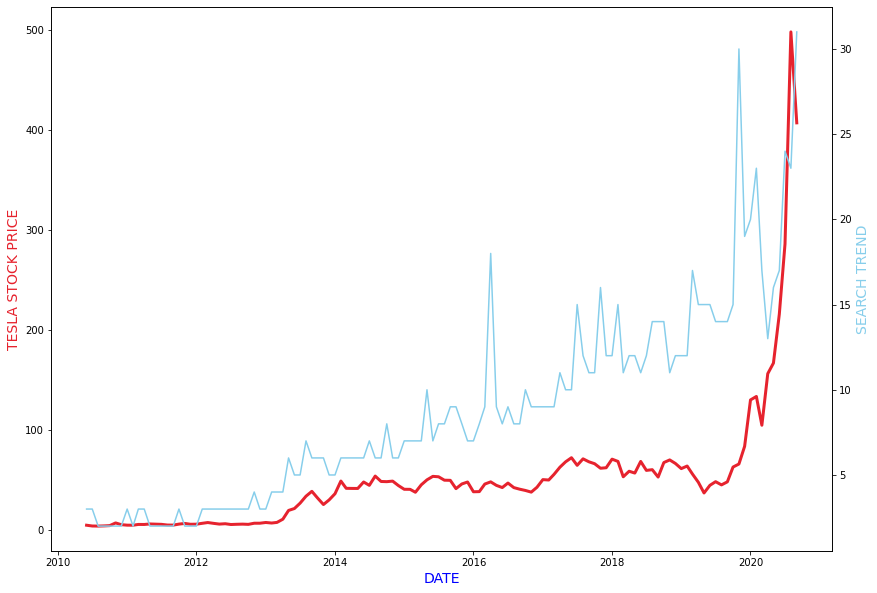

In [ ]:

plt.figure(figsize=(14,10),dpi=120)

# assigning title
plt.title('Tesla stocks vs price',fontsize=14)

# adding ticks on x axis
plt.xticks(fontsize=14,rotation=45)

ax1=plt.gca()
ax2=ax1.twinx()


ax1.set_ylabel('TESLA STOCK PRICE',color='#E6232E',fontsize=14)
ax2.set_ylabel('SEARCH TREND',color='skyblue',fontsize=14)
ax1.set_xlabel('DATE',color='b',fontsize=14)

ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE,color='#E6232E',linewidth=3)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH,color='skyblue')

plt.show()

How to add tick formatting for dates on the x-axis.

In [ ]:
import matplotlib.dates as mdates

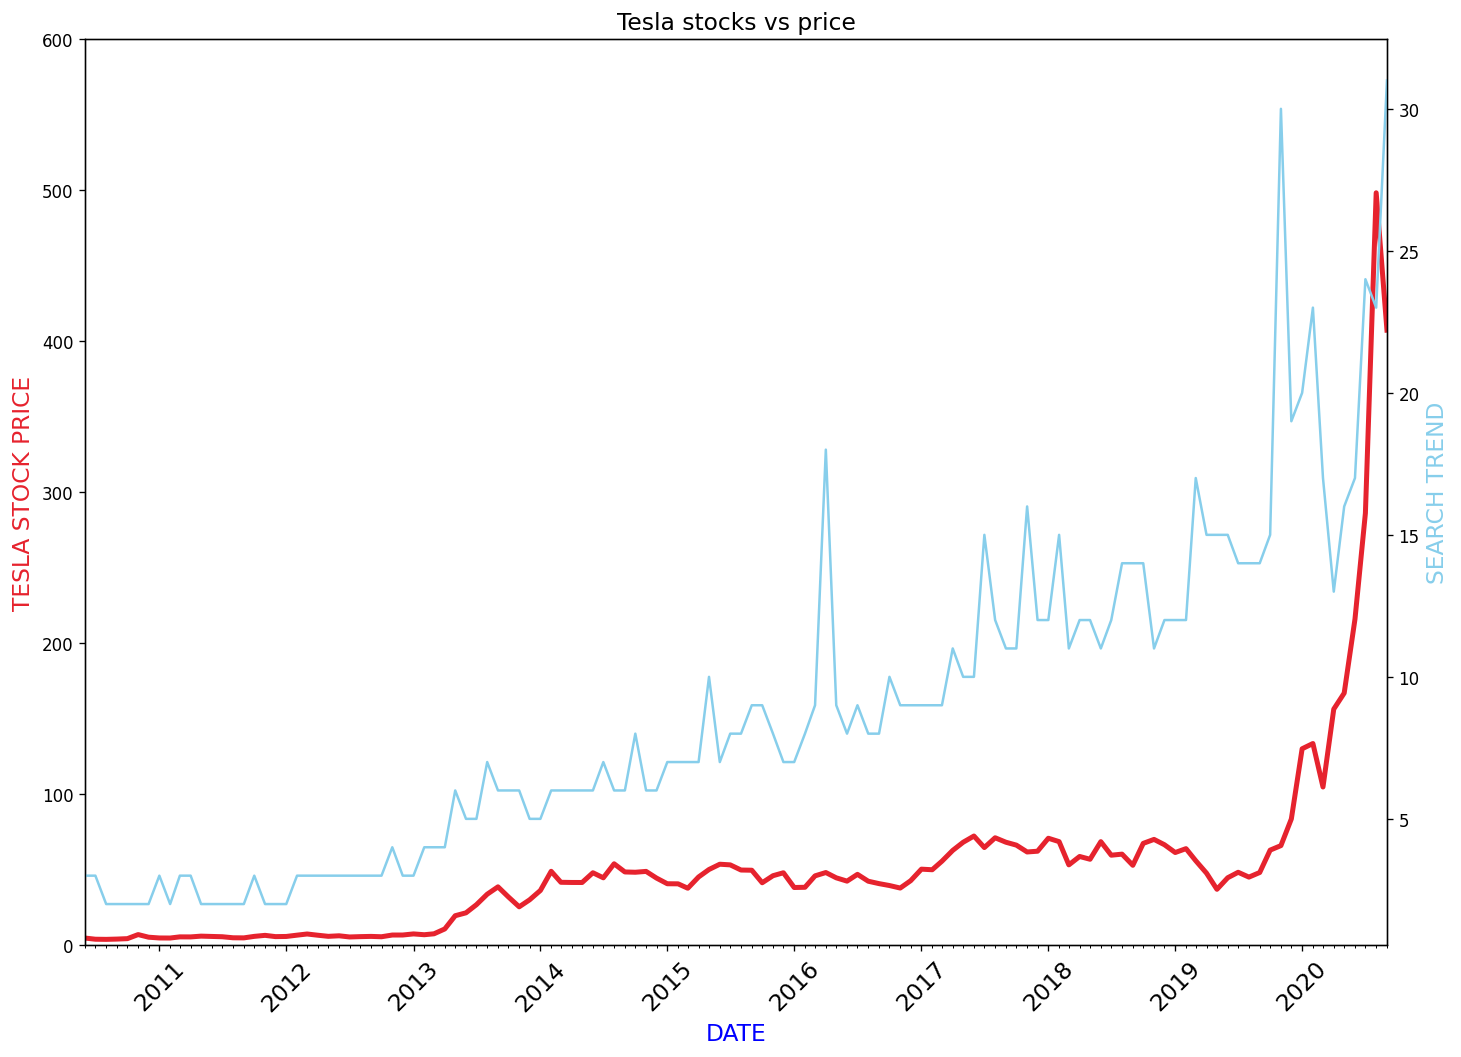

In [ ]:

plt.figure(figsize=(14,10),dpi=120)

# assigning title
plt.title('Tesla stocks vs price',fontsize=14)

# adding ticks on x axis
plt.xticks(fontsize=14,rotation=45)

ax1=plt.gca()
ax2=ax1.twinx()

# Create locators for ticks on the time axis..
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')

# creating major ticks (years) and minor ticks (months)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# limting our axes
ax1.set_ylim([0,600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])


ax1.set_ylabel('TESLA STOCK PRICE',color='#E6232E',fontsize=14)
ax2.set_ylabel('SEARCH TREND',color='skyblue',fontsize=14)
ax1.set_xlabel('DATE',color='b',fontsize=14)

ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE,color='#E6232E',linewidth=3)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH,color='skyblue')

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

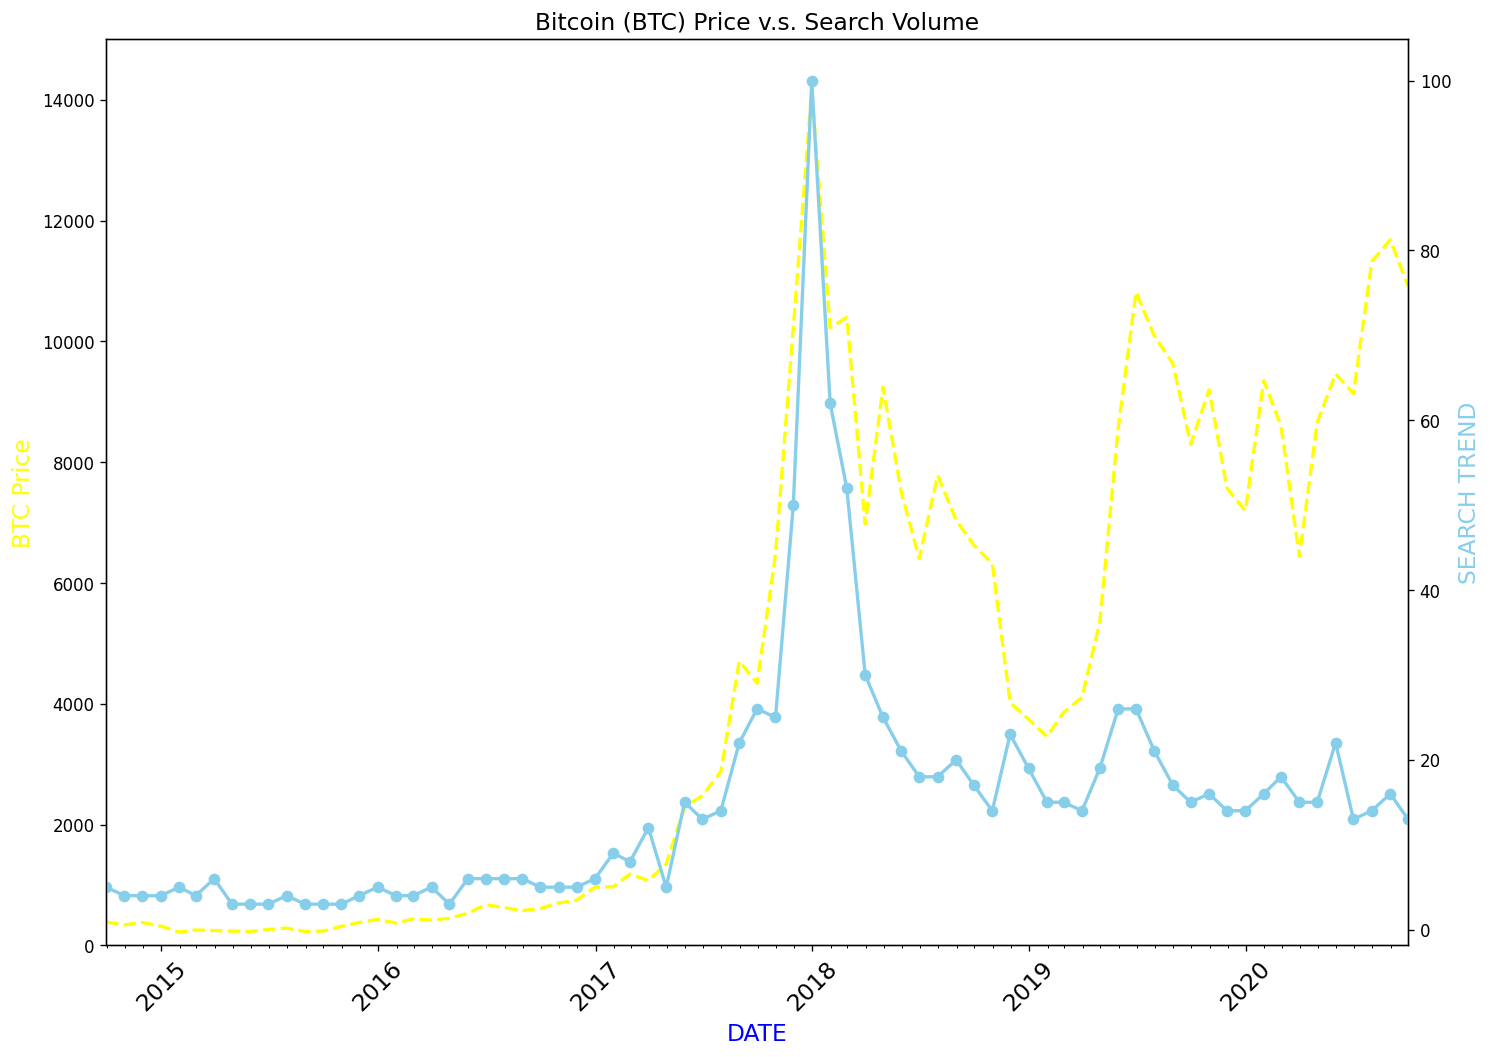

In [ ]:

plt.figure(figsize=(14,10),dpi=120)

# assigning title
plt.title('Bitcoin (BTC) Price v.s. Search Volume',fontsize=14)


# adding ticks on x axis
plt.xticks(fontsize=14,rotation=45)


ax1=plt.gca()
ax2=ax1.twinx()


# Create locators for ticks on the time axis..
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')


# creating major ticks (years) and minor ticks (months)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# creating limits on axes
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_price_monthly.index.min(), df_btc_price_monthly.index.max()])

ax1.set_ylabel('BTC Price',color='yellow',fontsize=14)
ax2.set_ylabel('SEARCH TREND',color='skyblue',fontsize=14)
ax1.set_xlabel('DATE',color='b',fontsize=14)


ax1.plot(df_btc_price_monthly.index,df_btc_price_monthly.CLOSE,color='yellow',linewidth=2,linestyle='--')
ax2.plot(df_btc_price_monthly.index,df_btc_search.BTC_NEWS_SEARCH,color='skyblue',linewidth=2,marker='o')


plt.show()

In [ ]:
print(df_btc_price_monthly.head())
print(df_btc_search.head())
df_unemployment.head()

                 DATE       CLOSE      VOLUME
DATE                                         
2014-09-30 2014-09-30  386.944000  34707300.0
2014-10-31 2014-10-31  338.321014  12545400.0
2014-11-30 2014-11-30  378.046997   9194440.0
2014-12-31 2014-12-31  320.192993  13942900.0
2015-01-31 2015-01-31  217.464005  23348200.0
       MONTH  BTC_NEWS_SEARCH
0 2014-09-01                5
1 2014-10-01                4
2 2014-11-01                4
3 2014-12-01                4
4 2015-01-01                5


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

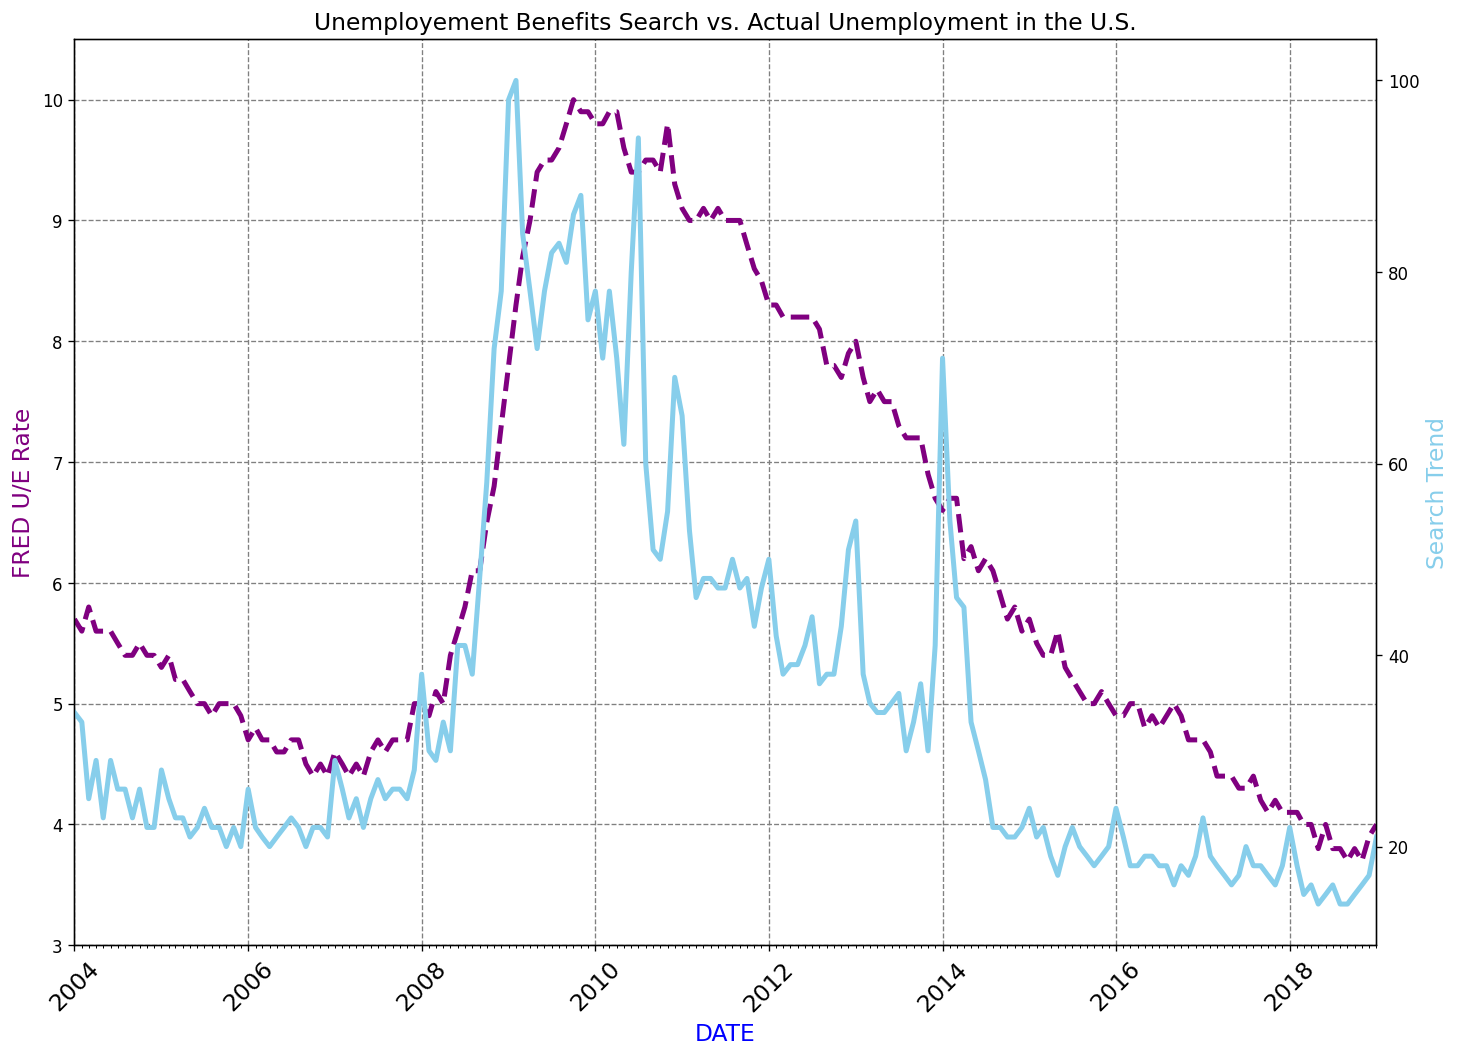

In [ ]:
plt.figure(figsize=(14,10),dpi=120)

# assigning title
plt.title('Unemployement Benefits Search vs. Actual Unemployment in the U.S.',fontsize=14)


# adding ticks on x axis
plt.xticks(fontsize=14,rotation=45)


ax1=plt.gca()
ax2=ax1.twinx()


# Create locators for ticks on the time axis..
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')


# creating major ticks (years) and minor ticks (months)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# creating limits on axes
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
ax1.set_xlabel('DATE',color='b',fontsize=14)

# show the grid line as grey dark colour
ax1.grid(color='grey',linestyle='--')



# finally plot our graph.
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,
         color='purple', linewidth=3, linestyle='--',linewidth=2)
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)


plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [ ]:
df_unemployment[['UE_BENEFITS_WEB_SEARCH','UNRATE']].head()

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,34,5.7
1,33,5.6
2,25,5.8
3,29,5.6
4,23,5.6


 ### 6-month rolling average search data against the actual unemployment. by sing **.rolling() and .mean()** methods
 <h3>roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()</h3>

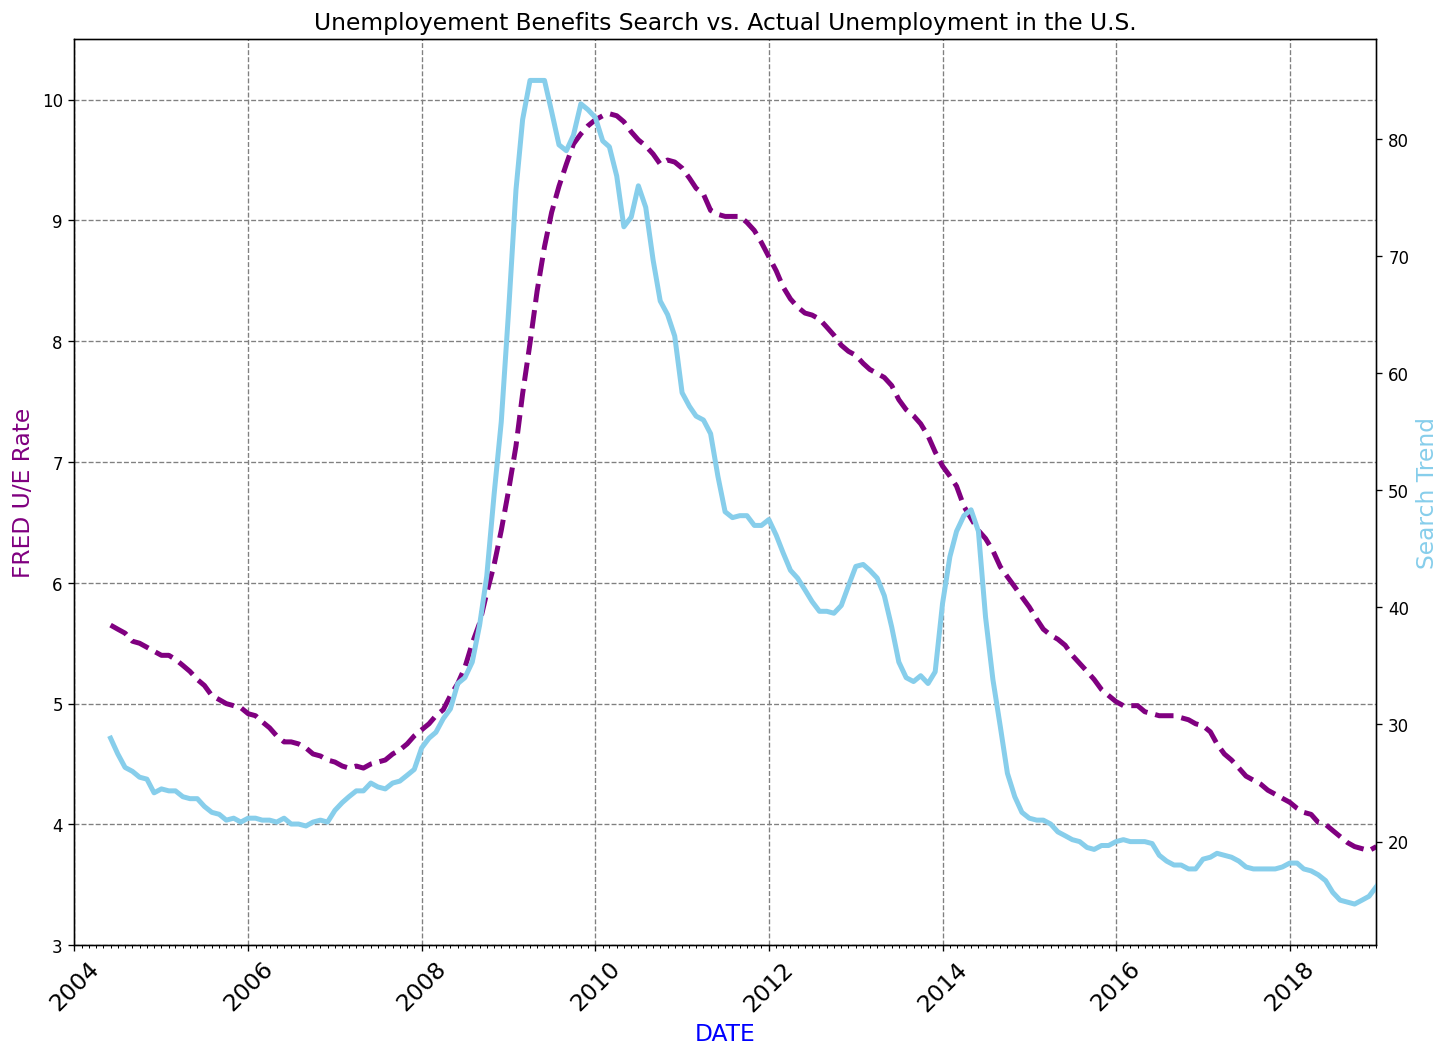

In [ ]:
plt.figure(figsize=(14,10),dpi=120)

# assigning title
plt.title('Unemployement Benefits Search vs. Actual Unemployment in the U.S.',fontsize=14)


# adding ticks on x axis
plt.xticks(fontsize=14,rotation=45)


ax1=plt.gca()
ax2=ax1.twinx()


# Create locators for ticks on the time axis..
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')


# creating major ticks (years) and minor ticks (months)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# creating limits on axes
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
ax1.set_xlabel('DATE',color='b',fontsize=14)

# show the grid line as grey dark colour
ax1.grid(color='grey',linestyle='--')

#calculate rolling avg over a 6 months.
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# finally plot our graph.
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE,
         color='purple', linewidth=3, linestyle='--',)
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [ ]:
df_benefit_2020=pd.read_csv('/content/data/UE Benefits Search vs UE Rate 2004-20.csv')
df_benefit_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [ ]:
df_benefit_2020.MONTH=pd.to_datetime(df_benefit_2020.MONTH)
df_benefit_2020.MONTH

0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
195   2020-04-01
196   2020-05-01
197   2020-06-01
198   2020-07-01
199   2020-08-01
Name: MONTH, Length: 200, dtype: datetime64[ns]

In [ ]:
type(df_benefit_2020.MONTH[1])

pandas._libs.tslibs.timestamps.Timestamp

Now plotting chart

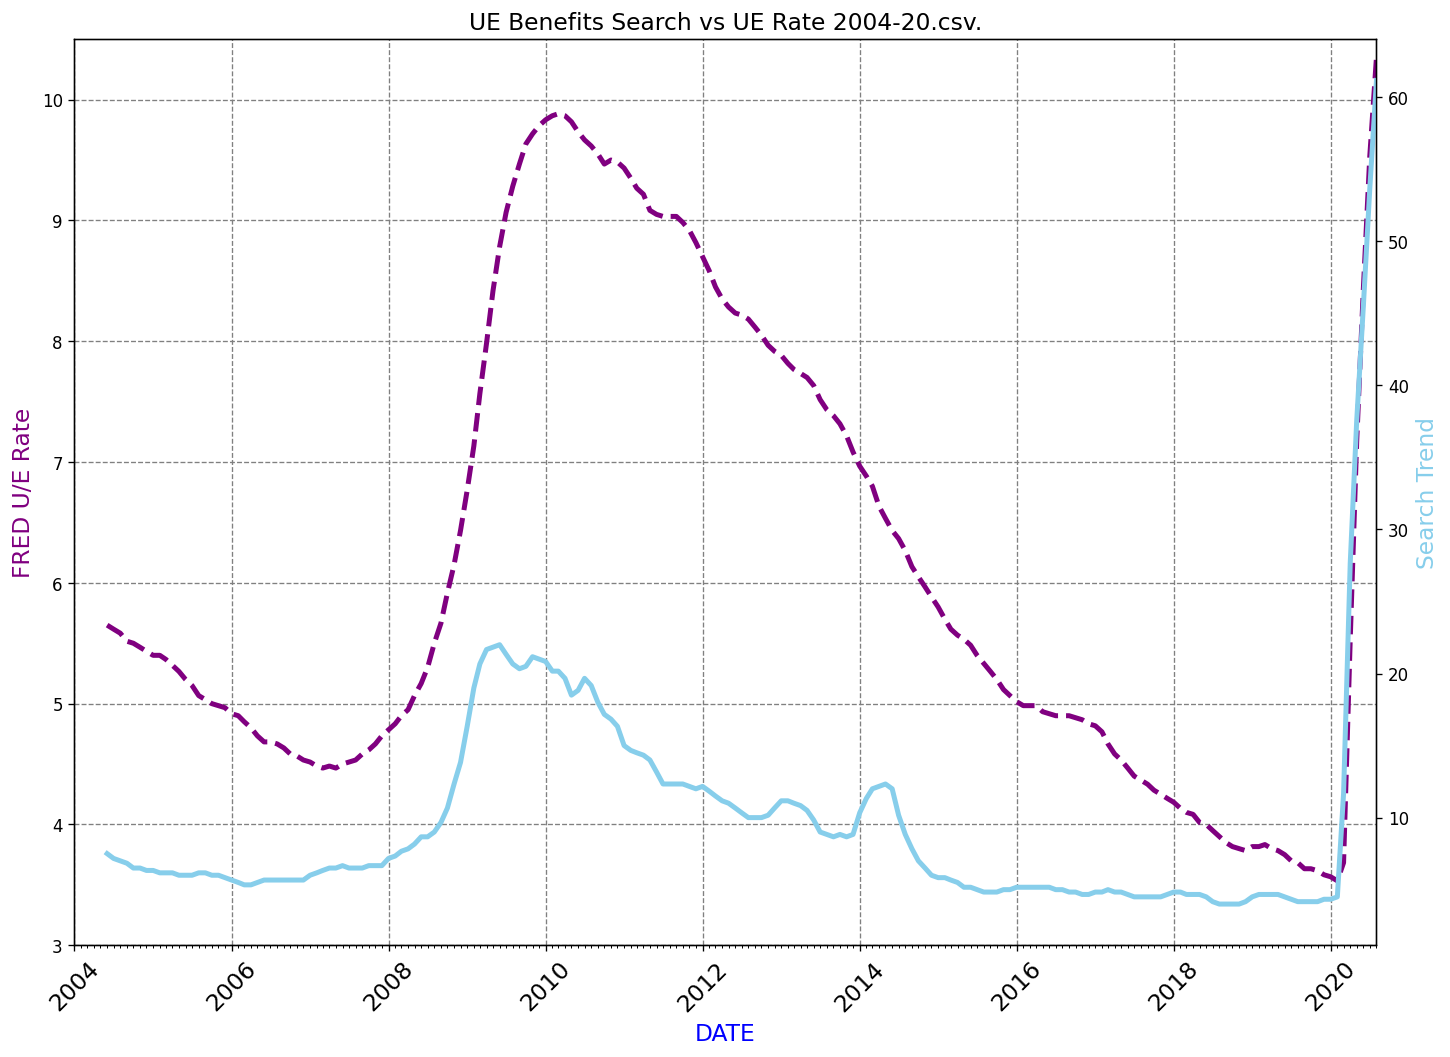

In [ ]:
plt.figure(figsize=(14,10),dpi=120)

# assigning title
plt.title('UE Benefits Search vs UE Rate 2004-20.csv.',fontsize=14)


# adding ticks on x axis
plt.xticks(fontsize=14,rotation=45)


ax1=plt.gca()
ax2=ax1.twinx()


# Create locators for ticks on the time axis..
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')


# creating major ticks (years) and minor ticks (months)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# creating limits on axes
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_benefit_2020.MONTH.min(), df_benefit_2020.MONTH.max()])

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
ax1.set_xlabel('DATE',color='b',fontsize=14)s

# show the grid line as grey dark colour
ax1.grid(color='grey',linestyle='--')

#calculate rolling avg over a 6 months.
roll_df = df_benefit_2020[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# finally plot our graph.
ax1.plot(df_benefit_2020.MONTH, roll_df.UNRATE,
         color='purple', linewidth=3, linestyle='--',)
ax2.plot(df_benefit_2020.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

plt.show()